In [ ]:
#Import libraries
import pandas as pd

In [ ]:
#Read the csv file to a dataframe
df = pd.read_csv('Raw Data Pfizer.csv')

File accessed through google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Raw Data Pfizer.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Show the dataframe
df.head(5)

,Patient_ID,Age,Gender,Ethnicity,Medical_History,Genomic_Profile,Trial_ID,Drug_Name,Trial_Phase,Start_Date,...,Side_Effects,Duration_of_Treatment,Success_Indicator,Gene_Name,Mutation_Status,Expression_Level,Biomarker_Level,Efficacy_Score,Survival_Rate,Progression_Free_Survival
0,P001,22,Male,African American,Heart Disease,NaN,T011,DrugC,Phase IV,9/16/2023,...,Headache,95,1,BRCA2,Positive,3.79,3.14,3.80,20.60,14.60
1,P002,61,Female,Other,Diabetes,HER2 Mutation,T014,DrugC,Phase I,11/4/2022,...,Headache,90,0,HER2,Negative,1.65,4.64,8.40,23.10,15.30
2,P003,60,Female,Other,Heart Disease,TP53 Mutation,T008,DrugA,Phase I,5/6/2022,...,Fatigue,64,1,HER2,Positive,3.45,2.67,9.40,21.60,3.80
3,P004,76,Other,Other,NaN,EGFR Mutation,T016,DrugB,Phase II,2/17/2023,...,Dizziness,159,1,BRCA2,Positive,1.11,2.51,8.30,23.80,5.60
4,P005,39,Female,Other,Asthma,BRCA2 Mutation,T019,DrugD,Phase I,8/26/2023,...,Dizziness,44,0,EGFR,Negative,3.38,2.52,9.70,21.20,17.30


In [ ]:
df.shape

(1000, 26)

In [ ]:
df.dtypes

,0
Patient_ID,object
Age,int64
Gender,object
Ethnicity,object
Medical_History,object
Genomic_Profile,object
Trial_ID,object
Drug_Name,object
Trial_Phase,object
Start_Date,object


In [ ]:
# Check for duplicates
df.duplicated().sum()


0

In [ ]:
df.isnull().sum() #check for missing values


,0
Patient_ID,0
Age,0
Gender,0
Ethnicity,0
Medical_History,182
Genomic_Profile,487
Trial_ID,0
Drug_Name,0
Trial_Phase,0
Start_Date,0


In [ ]:
from sklearn.preprocessing import LabelEncoder  #label encoding before using imputation

# Create a LabelEncoder object
encoder = LabelEncoder()

# Fit the encoder to the 'Medical_History' column and transform it
df['Medical_History'] = encoder.fit_transform(df['Medical_History'])

In [ ]:
df['Medical_History'].dtype

dtype('float64')

In [ ]:
from sklearn.impute import KNNImputer

# Now use the encoded column for imputation
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(df[['Medical_History']])

# Replace the original column with the imputed values (optional)
df['Medical_History'] = X_imputed

In [ ]:
df.isnull().sum() #check for missing values

,0
Patient_ID,0
Age,0
Gender,0
Ethnicity,0
Medical_History,0
Genomic_Profile,487
Trial_ID,0
Drug_Name,0
Trial_Phase,0
Start_Date,0


In [ ]:

# Fit the encoder to the 'Genomic_Profile' column and transform it
df['Genomic_Profile'] = encoder.fit_transform(df['Genomic_Profile'])

# Now use the encoded column for imputation
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(df[['Genomic_Profile']])

# Replace the original column with the imputed values
df['Genomic_Profile'] = X_imputed

# If you need the original string values back, you can inverse_transform:
# df['Genomic_Profile'] = encoder.inverse_transform(df['Genomic_Profile_Encoded'].astype(int))

In [ ]:
df['Adverse_Events'] = encoder.fit_transform(df['Adverse_Events'])

# Now use the encoded column for imputation
imputer = KNNImputer(n_neighbors=5)
# Correct the column name in fit_transform
X_imputed = imputer.fit_transform(df[['Adverse_Events']])

# Replace the original column with the imputed values
df['Adverse_Events'] = X_imputed

In [ ]:
df['Side_Effects'] = encoder.fit_transform(df['Side_Effects'])

# Now use the encoded column for imputation
imputer = KNNImputer(n_neighbors=5)
# Correct the column name in fit_transform
X_imputed = imputer.fit_transform(df[['Side_Effects']])

# Replace the original column with the imputed values
df['Side_Effects'] = X_imputed

In [ ]:
df.shape #no change in shape

(1000, 26)

In [ ]:
df.isnull().sum()

,0
Patient_ID,0
Age,0
Gender,0
Ethnicity,0
Medical_History,0
Genomic_Profile,0
Trial_ID,0
Drug_Name,0
Trial_Phase,0
Start_Date,0


In [ ]:
df.shape

(1000, 26)

In [ ]:
df.describe(include=['object'])

,Patient_ID,Gender,Ethnicity,Trial_ID,Drug_Name,Trial_Phase,Start_Date,End_Date,Dose,Treatment_ID,Dose_Administered,Treatment_Outcome,Gene_Name,Mutation_Status
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,5,20,4,4,756,771,4,197,4,3,5,2
top,P001,Male,African American,T019,DrugC,Phase I,11/5/2022,2/9/2022,100mg,TR0046,100mg,Improved,BRCA1,Negative
freq,1,353,208,64,270,257,5,4,262,13,262,347,212,529


In [ ]:
df.describe()

,Age,Medical_History,Duration_of_Treatment,Success_Indicator,Expression_Level,Biomarker_Level,Efficacy_Score,Survival_Rate,Progression_Free_Survival
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,51.06,1.92,103.70,0.35,2.98,2.98,5.40,14.96,11.59
std,19.66,1.41,43.30,0.48,1.15,1.18,2.56,5.16,4.89
min,18.00,0.00,30.00,0.00,1.00,1.00,1.00,6.00,3.00
25%,35.00,1.00,65.00,0.00,2.03,1.93,3.20,10.67,7.30
50%,52.00,2.00,103.00,0.00,2.93,3.00,5.40,14.90,11.70
75%,68.00,3.00,141.00,1.00,4.00,3.99,7.53,19.40,15.70
max,85.00,4.00,180.00,1.00,4.98,5.00,10.00,24.00,20.00


In [ ]:
df['Dose'] = df['Dose'].str.replace('mg', '')
df['Dose_Administered'] = df['Dose_Administered'].str.replace('mg', '')

In [ ]:
df['Dose'].head()

,Dose
0,200
1,100
2,150
3,150
4,200


In [ ]:
df['Dose_Administered'].head()

,Dose_Administered
0,200
1,100
2,150
3,150
4,200


In [ ]:
#looking at start date and end date

# Assuming your DataFrame is named 'df' and has 'Start_Date' and 'End_Date' columns
# Convert columns to datetime objects if they're not already
df['Start_Date'] = pd.to_datetime(df['Start_Date'])
df['End_Date'] = pd.to_datetime(df['End_Date'])

# Calculate the difference in days
df['Date_Difference'] = (df['End_Date'] - df['Start_Date']).dt.days

# Now, 'Date_Difference' column contains the difference as an integer value
# We can merge this with your original DataFrame if needed

# Display the updated DataFrame
df['Date_Difference'].head()  # counting the number of days

,Date_Difference
0,243
1,242
2,365
3,394
4,184


In [ ]:
df.shape # Date_Difference is added

(1000, 27)

In [ ]:
#Seaparate the features
#Separate the features by separating the taret variable and the irrelevant features
features = df.drop(['Success_Indicator', 'Start_Date', 'End_Date', 'Patient_ID'], axis = 'columns')

In [ ]:
features.shape

(1000, 23)

In [ ]:
features.columns

Index(['Age', 'Gender', 'Ethnicity', 'Medical_History', 'Genomic_Profile',
       'Trial_ID', 'Drug_Name', 'Trial_Phase', 'Dose', 'Adverse_Events',
       'Treatment_ID', 'Dose_Administered', 'Treatment_Outcome',
       'Side_Effects', 'Duration_of_Treatment', 'Gene_Name', 'Mutation_Status',
       'Expression_Level', 'Biomarker_Level', 'Efficacy_Score',
       'Survival_Rate', 'Progression_Free_Survival', 'Date_Difference'],
      dtype='object')

In [ ]:
#Separate the target
target = df[['Success_Indicator']]

In [ ]:
#Encode the values of features since current values are not numeric
from sklearn.preprocessing import LabelEncoder
LE_Drug_Name = LabelEncoder()
LE_Gender = LabelEncoder()
LE_Ethnicity = LabelEncoder()
#LE_Medical_History = LabelEncoder()  -- already encoded
#LE_Genomic_Profile = LabelEncoder()
LE_Trial_Phase = LabelEncoder()
#LE_Adverse_Events = LabelEncoder()
LE_Treatment_ID = LabelEncoder()
LE_Treatment_Outcome = LabelEncoder()
#LE_Side_Effects = LabelEncoder()
LE_Gene_Name = LabelEncoder()
LE_Mutation_Status = LabelEncoder()

In [ ]:
features['Drug_Name'] = LE_Drug_Name.fit_transform(features['Drug_Name'])


features['Gender'] = LE_Gender.fit_transform(features['Gender'])
features['Ethnicity'] = LE_Ethnicity.fit_transform(features['Ethnicity'])
#features['Medical_History'] = LE_Medical_History.fit_transform(features['Medical_History']) -- already encoded before imputing
#features['Genomic_Profile'] = LE_Genomic_Profile.fit_transform(features['Genomic_Profile'])
features['Trial_Phase'] = LE_Trial_Phase.fit_transform(features['Trial_Phase'])
features['Trial_ID'] = LE_Trial_Phase.fit_transform(features['Trial_ID'])

#features['Adverse_Events'] = LE_Adverse_Events.fit_transform(features['Adverse_Events'])
features['Treatment_ID'] = LE_Treatment_ID.fit_transform(features['Treatment_ID'])

features['Treatment_Outcome'] = LE_Treatment_Outcome.fit_transform(features['Treatment_Outcome'])
#features['Side_Effects'] = LE_Side_Effects.fit_transform(features['Side_Effects'])
features['Gene_Name'] = LE_Gene_Name.fit_transform(features['Gene_Name'])
features['Mutation_Status'] = LE_Mutation_Status.fit_transform(features['Mutation_Status'])


In [ ]:
features.head() #view the features with encoded values

,Age,Gender,Ethnicity,Medical_History,Genomic_Profile,Trial_ID,Drug_Name,Trial_Phase,Dose,Adverse_Events,...,Side_Effects,Duration_of_Treatment,Gene_Name,Mutation_Status,Expression_Level,Biomarker_Level,Efficacy_Score,Survival_Rate,Progression_Free_Survival,Date_Difference
0,22,1,0,2.0,5.0,10,2,3,200,26.0,...,2.0,95,1,1,3.79,3.14,3.8,20.6,14.6,243
1,61,0,4,1.0,3.0,13,2,0,100,72.0,...,2.0,90,3,0,1.65,4.64,8.4,23.1,15.3,242
2,60,0,4,2.0,4.0,7,0,0,150,66.0,...,1.0,64,3,1,3.45,2.67,9.4,21.6,3.8,365
3,76,2,4,4.0,2.0,15,1,1,150,0.0,...,0.0,159,1,1,1.11,2.51,8.3,23.8,5.6,394
4,39,0,4,0.0,1.0,18,3,0,200,0.0,...,0.0,44,2,0,3.38,2.52,9.7,21.2,17.3,184


In [ ]:
features.shape

(1000, 23)

In [ ]:
target.head() #view the target with encoded values

,Success_Indicator
0,1
1,0
2,1
3,1
4,0


In [ ]:
features.dtypes

,0
Age,int64
Gender,int64
Ethnicity,int64
Medical_History,float64
Genomic_Profile,float64
Trial_ID,int64
Drug_Name,int64
Trial_Phase,int64
Dose,object
Adverse_Events,float64


In [ ]:
# Extract columns (simulated separate processing)
dose = features['Dose'].astype(int)  # Change to int
dose_administered = features['Dose_Administered'].astype(int)

Normalization - minmax

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize Min-Max Scaler
scaler = MinMaxScaler()

# Fit and transform the features
features_scaled = scaler.fit_transform(features)

# Convert back to a DataFrame to retain column names and indices
features = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)



In [ ]:
# Fit and transform the target
target_scaled = scaler.fit_transform(target)

# Convert back to a DataFrame to retain column names and indices
target = pd.DataFrame(target_scaled, columns=target.columns, index=features.index)

In [ ]:
#Display Training data
features.head()

,Age,Gender,Ethnicity,Medical_History,Genomic_Profile,Trial_ID,Drug_Name,Trial_Phase,Dose,Adverse_Events,...,Side_Effects,Duration_of_Treatment,Gene_Name,Mutation_Status,Expression_Level,Biomarker_Level,Efficacy_Score,Survival_Rate,Progression_Free_Survival,Date_Difference
0,0.059701,0.5,0.0,0.50,1.0,0.526316,0.666667,1.000000,1.000000,0.309524,...,0.50,0.433333,0.25,1.0,0.701005,0.5350,0.311111,0.811111,0.682353,0.168022
1,0.641791,0.0,1.0,0.25,0.6,0.684211,0.666667,0.000000,0.333333,0.857143,...,0.50,0.400000,0.75,0.0,0.163317,0.9100,0.822222,0.950000,0.723529,0.165312
2,0.626866,0.0,1.0,0.50,0.8,0.368421,0.000000,0.000000,0.666667,0.785714,...,0.25,0.226667,0.75,1.0,0.615578,0.4175,0.933333,0.866667,0.047059,0.498645
3,0.865672,1.0,1.0,1.00,0.4,0.789474,0.333333,0.333333,0.666667,0.000000,...,0.00,0.860000,0.25,1.0,0.027638,0.3775,0.811111,0.988889,0.152941,0.577236
4,0.313433,0.0,1.0,0.00,0.2,0.947368,1.000000,0.000000,1.000000,0.000000,...,0.00,0.093333,0.50,0.0,0.597990,0.3800,0.966667,0.844444,0.841176,0.008130


In [ ]:
target.head()

,Success_Indicator
0,1.0
1,0.0
2,1.0
3,1.0
4,0.0


In [ ]:
#Assigning to conventional variables, the features and target
X_train = features
Y_train = target

In [ ]:
#Split the datset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.3, random_state=False)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(700, 23)
(300, 23)
(700, 1)
(300, 1)


In [ ]:
Y_train['Success_Indicator'].value_counts() #checking if balanced data

,count
Success_Indicator,
0.0,452
1.0,248


In [ ]:
#SMOTE stands for Synthetic Minority Over-sampling Technique.
# a technique used in machine learning to address class imbalance in datasets.
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
#SMOTE increased your training data by creating new,
#synthetic samples of the minority class, bringing the total number # of samples to 904.
#This helps to balance the dataset and improve the performance of machine learning models, especially in cases where the original dataset is imbalanced.

(904, 23)
(300, 23)
(904, 1)
(300, 1)


In [ ]:
Y_train['Success_Indicator'].value_counts()

,count
Success_Indicator,
0.0,452
1.0,452


In [ ]:
Y_test['Success_Indicator'].value_counts() #neednt be balanced

,count
Success_Indicator,
0.0,201
1.0,99


In [ ]:
!pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier

# Initialize LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit LazyClassifier with your pre-split data
models, predictions = clf.fit(X_train, X_test, Y_train, Y_test)

# Display the performance of all models
print(models)

# Save the results to a CSV file (optional)
models.to_csv("lazy_classification_results.csv")

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
 97%|█████████▋| 31/32 [00:07<00:00,  2.87it/s]

[LightGBM] [Info] Number of positive: 452, number of negative: 452
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000447 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2845
[LightGBM] [Info] Number of data points in the train set: 904, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

100%|██████████| 32/32 [00:07<00:00,  4.38it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
AdaBoostClassifier                 1.00               1.00     1.00      1.00   
ExtraTreesClassifier               1.00               1.00     1.00      1.00   
BaggingClassifier                  1.00               1.00     1.00      1.00   
GaussianNB                         1.00               1.00     1.00      1.00   
LGBMClassifier                     1.00               1.00     1.00      1.00   
DecisionTreeClassifier             1.00               1.00     1.00      1.00   
QuadraticDiscriminantAnalysis      1.00               0.99     0.99      1.00   
RandomForestClassifier             1.00               0.99     0.99      1.00   
NuSVC                              0.88               0.83     0.83      0.87   
ExtraTreeClassifier                0.83               0.82     0.82      0.83   
BernoulliNB                 

In [ ]:
#choosing decision tree classifier since it gies 100% acc in least time

from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
model = DecisionTreeClassifier()

# Train Decision Tree Classifer
model = model.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = model.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 1.0


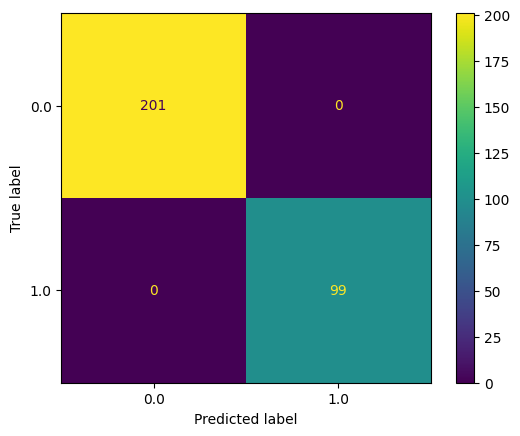

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Generate the confusion matrix
cm = ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test)

# Optionally, you can customize the plot
# cm.plot(cmap=plt.cm.Blues)

# Display the plot
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Assuming you already have Y_test and Y_pred
report = classification_report(Y_test, Y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       201
         1.0       1.00      1.00      1.00        99

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [ ]:
#saving the model to a pickle file
#import the pickle module, which is a built-in Python library
#used for object serialization.
#Serialization is the process of converting an object into a byte stream,
# which can then be stored in a file or transmitted over a network.

import pickle

#This line opens a file named 'model_pickle' in write binary ('wb') mode.
with open('model_pickle','wb') as file:
    pickle.dump(model,file) #saving of the model using the pickle.dump()

    # Load the pickle file
with open('model_pickle', 'rb') as file:
    mp = pickle.load(file)

In [ ]:
!pip install gradio

In [ ]:


# Define the prediction function
def predict_treatment_success(feature1, feature2, feature3, feature4, feature5, feature6 , feature7, feature8, feature9, feature10, feature11, feature12, feature13, feature14, feature15, feature16, feature17, feature18, feature19, feature20, feature21, feature22, feature23):
    # Convert input to the required format
    features = [float(feature1), float(feature2), float(feature3), float(feature4), float(feature5), float(feature6), float(feature7), float(feature8), float(feature9), float(feature10), float(feature11), float(feature12), float(feature13), float(feature14), float(feature15), float(feature16), float(feature17), float(feature18), float(feature19), float(feature20), float(feature21), float(feature22), float(feature23)]
    prediction = mp.predict([features])  # Use mp instead of model
    return f"Treatment Success: {prediction[0]}"

# Create a Gradio interface
import gradio as gr
interface = gr.Interface(
    fn = predict_treatment_success,
    inputs=[
        gr.Number(label="Age"),
        gr.Number(label="Gender"),
        gr.Number(label="Ethnicity"),
        gr.Number(label="Medical_History"),
        gr.Number(label="Genomic_Profile"),
        gr.Number(label="Trial_ID"),
        gr.Number(label="Drug_Name"),
      	gr.Number(label="Trial_Phase"),
        gr.Number(label="Dose"),
        gr.Number(label="Adverse_Events"),
        gr.Number(label="Treatment_ID"),
        gr.Number(label="Dose_Administered"),
        gr.Number(label="Treatment_Outcome"),
        gr.Number(label="Side_Effects"),
        gr.Number(label="Duration_of_Treatment"),
        gr.Number(label="Gene_Name"),
        gr.Number(label="Mutation_Status"),
        gr.Number(label="Expression_Level"),
        gr.Number(label="Biomarker_Level"),
        gr.Number(label="Efficacy_Score"),
        gr.Number(label="Survival_Rate"),
        gr.Number(label="Progression_Free_Survival"),
        gr.Number(label="Date_Difference")
      ],
    outputs="text",
    title="Treatment Success Predictor",
    description="Enter the 23 features to get a prediction."
)

# Launch the app
interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://9ed273284b9a90ebac.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
X_test.iloc[1]

,859
Age,0.64
Gender,0.50
Ethnicity,0.75
Medical_History,0.50
Genomic_Profile,0.80
Trial_ID,0.95
Drug_Name,1.00
Trial_Phase,1.00
Dose,0.33
Adverse_Events,0.40


In [ ]:
Y_test.iloc[1]

,859
Success_Indicator,1.00


#Classification model Objective: Predict whether a treatment is successful.
###Target Variable: Success_Indicator (binary: 1 = success, 0 = failure).
###Features (examples): Age, Gender, Ethnicity, Medical_History, Drug_Name, Trial_Phase, Mutation_Status, Expression_Level, Biomarker_Level.